In [1]:
import pandas as pd
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

/Users/hyturing/miniconda3/envs/random/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/hyturing/miniconda3/envs/random/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [7]:
customer_info = pd.read_csv("customer_info.csv")

In [8]:
customer_info.head()

,CustomerID,AccountBalance,LastLogin,Name,Age,Address,TransactionID,Amount,SuspiciousFlag
0,1001,9507.272060,2022-01-01,Customer 1001,54,Address 1001,787.0,33.670626,0
1,1002,7408.704536,2022-01-02,Customer 1002,35,Address 1002,NaN,NaN,0
2,1003,1715.321989,2022-01-03,Customer 1003,40,Address 1003,641.0,30.980239,0
3,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,450.0,11.167088,0
4,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,921.0,45.849784,0


In [9]:
customer_info_clean = customer_info.dropna()

In [10]:
customer_info_clean['LastLogin'] = pd.to_datetime(customer_info_clean['LastLogin'])
customer_info_clean['LastLoginDays'] = (customer_info_clean['LastLogin'] - customer_info_clean['LastLogin'].min()).dt.days.astype(int)
selected_features = ['CustomerID', 'AccountBalance', 'LastLoginDays', 'Age', 'TransactionID', 'Amount']
customer_info_train = customer_info_clean[selected_features]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
customer_info_train

,CustomerID,AccountBalance,LastLoginDays,Age,TransactionID,Amount
0,1001,9507.272060,0,54,787.0,33.670626
2,1003,1715.321989,2,40,641.0,30.980239
3,1004,3101.509134,3,30,450.0,11.167088
4,1004,3101.509134,3,30,921.0,45.849784
5,1005,5405.766914,4,46,599.0,81.808651
...,...,...,...,...,...,...
1359,1999,7376.854107,998,57,236.0,69.825072
1360,1999,7376.854107,998,57,805.0,34.780068
1361,2000,4853.024380,999,42,44.0,86.971920
1362,2000,4853.024380,999,42,779.0,86.049092


In [12]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01)
model.fit(customer_info_train)

IsolationForest(contamination=0.01)

In [13]:
customer_info_clean["Anomaly"] = model.predict(customer_info_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
customer_info_clean[customer_info_clean["Anomaly"] == -1]

,CustomerID,AccountBalance,LastLogin,Name,Age,Address,TransactionID,Amount,SuspiciousFlag,LastLoginDays,Anomaly
37,1027,9527.947107,2022-01-27,Customer 1027,46,Address 1027,2.0,12.881180,0,26,-1
1172,1854,9960.172528,2024-05-03,Customer 1854,57,Address 1854,18.0,27.054937,0,853,-1
1266,1928,9352.655675,2024-07-16,Customer 1928,60,Address 1928,999.0,93.633040,0,927,-1
1282,1942,9839.150446,2024-07-30,Customer 1942,51,Address 1942,954.0,98.300410,0,941,-1
1306,1960,9934.498597,2024-08-17,Customer 1960,34,Address 1960,27.0,20.489321,0,959,-1
1349,1993,8330.438296,2024-09-19,Customer 1993,60,Address 1993,32.0,77.726944,0,992,-1
1350,1994,8791.304689,2024-09-20,Customer 1994,63,Address 1994,48.0,17.640569,0,993,-1
1352,1995,2240.517799,2024-09-21,Customer 1995,38,Address 1995,106.0,13.915100,0,994,-1
1356,1996,8523.485163,2024-09-22,Customer 1996,33,Address 1996,902.0,11.657829,0,995,-1
1358,1998,9148.652759,2024-09-24,Customer 1998,25,Address 1998,152.0,10.642141,0,997,-1


In [21]:
customer_info_train

,CustomerID,AccountBalance,LastLoginDays,Age,TransactionID,Amount
0,1001,9507.272060,0,54,787.0,33.670626
2,1003,1715.321989,2,40,641.0,30.980239
3,1004,3101.509134,3,30,450.0,11.167088
4,1004,3101.509134,3,30,921.0,45.849784
5,1005,5405.766914,4,46,599.0,81.808651
...,...,...,...,...,...,...
1359,1999,7376.854107,998,57,236.0,69.825072
1360,1999,7376.854107,998,57,805.0,34.780068
1361,2000,4853.024380,999,42,44.0,86.971920
1362,2000,4853.024380,999,42,779.0,86.049092


In [15]:
shap.initjs()

In [16]:
# customer_info_explain = customer_info_train[["CustomerID", "AccountBalance", "LastLoginDays", "Age", "TransactionID", "Amount"]]

In [22]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(customer_info_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

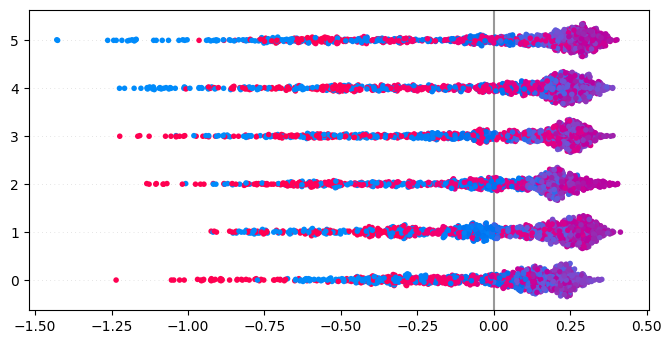

In [23]:
shap.summary_plot(shap_values, customer_info_train)